In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
pd.set_option('display.max_rows', 500)

# Q2

## Normal ETC and UCB

In [2]:
mean1 = 0
mean2 = np.arange(0,1,0.01)
n = 1000

In [3]:
def etc_n(m1, m2, n):
    # optimal m
    if m2 - m1 != 0:
        optimal = int(np.round(max(1,(4/(max(m1,m2)-min(m1,m2)) * np.log((n*(max(m1,m2)-min(m1,m2))/4))))))
    else:
        optimal = 1
    
    regret = []
    for j in range(1000):
        # optimal mean
        max_mean = max(m1, m2) 

        # reward accumulated during explore
        m1_reward = m1*(optimal)
        m2_reward = m2*(optimal)
        explore_reward = m1_reward + m2_reward

        # empirical mean for each arm
        m1_explore = sum([np.random.normal(m1, 1) for i in range(optimal)])/(optimal)
        m2_explore = sum([np.random.normal(m2, 1) for i in range(optimal)])/(optimal)

        # choosing theoretical mean to exploit with (based on higher empirical mean)
        chosen = m1 if m1_explore > m2_explore else m2

        # reward accumulated during exploit
        exploit_reward = chosen * (n - 2*optimal)

        # total reward (explore and exploit)
        total_reward = explore_reward + exploit_reward

        # optimal reward (explore and exploit using optimal mean)
        true_reward = max_mean * n

        regret.append(true_reward - total_reward)
    return np.mean(regret)

In [4]:
normal_etc = pd.DataFrame()
normal_etc['μ2-μ1'] = [each - mean1 for each in mean2]
normal_etc['regret'] = [etc_n(mean1, each, n) for each in mean2]
normal_etc

,μ2-μ1,regret
0,0.00,0.00000
1,0.01,4.87498
2,0.02,9.28800
3,0.03,13.18434
4,0.04,16.17680
...,...,...
95,0.95,22.75630
96,0.96,22.08000
97,0.97,22.31000
98,0.98,21.56000


In [5]:
error = 1/(1000**2)

In [6]:
def ucb_n(m1, m2, n, error):
    regret = []
    for i in range(100):
        true_reward = max(m1, m2) * n

        m1_empirical = []
        m2_empirical = []

        for j in range(n):
            ucb = [0,0]

            # arm1 calculation
            if len(m1_empirical) == 0:
                ucb[0] = float('inf')
            else:
                ucb[0] = np.mean(m1_empirical) + np.sqrt((2*np.log(1/error))/len(m1_empirical))

            # arm2 calculation
            if len(m2_empirical) == 0:
                ucb[1] = float('inf')
            else:
                ucb[1] = np.mean(m2_empirical) + np.sqrt((2*np.log(1/error))/len(m2_empirical))

            if ucb.index(max(ucb)) == 0:
                m1_empirical.append(np.random.normal(m1, 1))
            else:
                m2_empirical.append(np.random.normal(m2, 1))
                
        regret.append(true_reward - (len(m1_empirical)*m1 + len(m2_empirical)*m2))
    
    return [np.mean(regret), np.var(regret)]

In [7]:
normal_ucb = pd.DataFrame()
normal_ucb['μ2-μ1'] = [each - mean1 for each in mean2]
normal_ucb['regret'] = [ucb_n(mean1, each, n, error)[0] for each in mean2]
normal_ucb['variance'] = [ucb_n(mean1, each, n, error)[1] for each in mean2]
normal_ucb

,μ2-μ1,regret,variance
0,0.00,0.0000,0.000000
1,0.01,4.6525,1.955636
2,0.02,9.4014,5.952421
3,0.03,13.6164,15.977382
4,0.04,17.1504,26.352048
...,...,...,...
95,0.95,21.0235,68.511573
96,0.96,20.1216,67.326935
97,0.97,21.5922,84.887622
98,0.98,21.3640,56.280496


## Bernoulli ETC and UCB

In [8]:
prob1 = 1/2
prob2 = mean2

In [9]:
def etc_b(b1, b2, n):
    # optimal m
    if b2 - b1 != 0:
        optimal = int(np.round(max(1,(4/(max(b1,b2)-min(b1,b2)) * np.log((n*(max(b1,b2)-min(b1,b2))/4))))))
    else:
        optimal = 1
    
    regret = []
    for j in range(1000):
        # optimal mean
        max_mean = max(b1, b2) 

        # reward accumulated during explore
        b1_reward = b1*(optimal)
        b2_reward = b2*(optimal)
        explore_reward = b1_reward + b2_reward

        # empirical mean for each arm
        b1_explore = sum(np.random.choice([0,1], optimal, p=[1-b1, b1]))/optimal
        b2_explore = sum(np.random.choice([0,1], optimal, p=[1-b2, b2]))/optimal

        # choosing theoretical mean to exploit with (based on higher empirical mean)
        chosen = b1 if b1_explore > b2_explore else b2

        # reward accumulated during exploit
        exploit_reward = chosen * (n - 2*optimal)

        # total reward (explore and exploit)
        total_reward = explore_reward + exploit_reward

        # optimal reward (explore and exploit using optimal mean)
        true_reward = max_mean * n

        regret.append(true_reward - total_reward)
    return np.mean(regret)

In [10]:
bernoulli_etc = pd.DataFrame()
bernoulli_etc['μ2-μ1'] = [each - prob1 for each in prob2]
bernoulli_etc['regret'] = [etc_b(prob1, each, 1000) for each in prob2]
bernoulli_etc

,μ2-μ1,regret
0,-0.50,19.50
1,-0.49,19.11
2,-0.48,19.20
3,-0.47,19.27
4,-0.46,18.86
...,...,...
95,0.45,18.90
96,0.46,18.86
97,0.47,19.27
98,0.48,19.20


In [11]:
def ucb_b(b1, b2, n, error):
    regret = []
    for i in range(100):
        true_reward = max(b1, b2) * n

        arm1_count = 0
        arm2_count = 0

        b1_empirical = []
        b2_empirical = []

        for j in range(n):
            ucb = [0,0]

            # arm1 calculation
            if arm1_count == 0:
                ucb[0] = float('inf')
            else:
                ucb[0] = np.mean(b1_empirical) + np.sqrt((2*np.log(1/error))/arm1_count)

            # arm2 calculation
            if arm2_count == 0:
                ucb[1] = float('inf')
            else:
                ucb[1] = np.mean(b2_empirical) + np.sqrt((2*np.log(1/error))/arm2_count)

            if ucb.index(max(ucb)) == 0:
                arm1_count += 1
                b1_empirical.append(np.random.choice([0,1], p=[1-b1, b1]))
            else:
                arm2_count += 1
                b2_empirical.append(np.random.choice([0,1], p=[1-b2, b2]))
        regret.append(true_reward - (len(b1_empirical)*b1 + len(b2_empirical)*b2))
        
    return [np.mean(regret), np.var(regret)]

In [12]:
bernoulli_ucb = pd.DataFrame()
bernoulli_ucb['μ2-μ1'] = [each - prob1 for each in prob2]
bernoulli_ucb['regret'] = [ucb_b(prob1, each, n, error)[0] for each in prob2]
bernoulli_ucb['variance'] = [ucb_b(prob1, each, n, error)[1] for each in prob2]
bernoulli_ucb

,μ2-μ1,regret,variance
0,-0.50,30.9500,2.470475
1,-0.49,31.0366,3.556625
2,-0.48,31.6896,5.135708
3,-0.47,31.7579,6.985830
4,-0.46,32.4392,9.660365
...,...,...,...
95,0.45,31.7610,30.785569
96,0.46,31.3306,37.035311
97,0.47,31.1140,31.725658
98,0.48,31.6512,29.180252


## Graphs

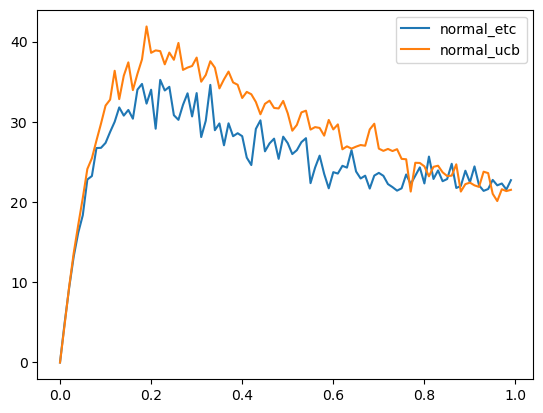

In [36]:
plt.plot(normal_etc['μ2-μ1'], normal_etc['regret'], label='normal_etc')
plt.plot(normal_ucb['μ2-μ1'], normal_ucb['regret'], label='normal_ucb')
plt.legend()

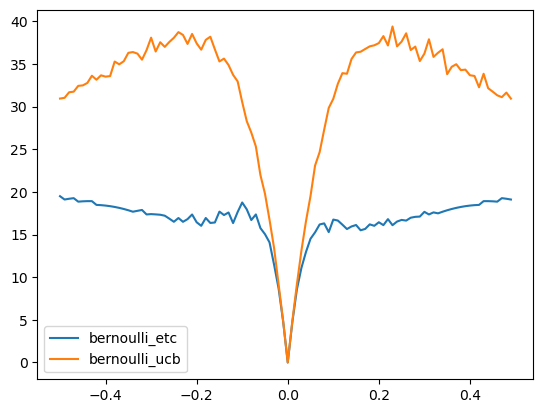

In [35]:
plt.plot(bernoulli_etc['μ2-μ1'], bernoulli_etc['regret'], label='bernoulli_etc')
plt.plot(bernoulli_ucb['μ2-μ1'], bernoulli_ucb['regret'], label='bernoulli_ucb')
plt.legend()

# Q3

## Normal UCB, Asymp. opt. UCB, MOSS

In [15]:
normal_ucb

,μ2-μ1,regret,variance
0,0.00,0.0000,0.000000
1,0.01,4.6525,1.955636
2,0.02,9.4014,5.952421
3,0.03,13.6164,15.977382
4,0.04,17.1504,26.352048
...,...,...,...
95,0.95,21.0235,68.511573
96,0.96,20.1216,67.326935
97,0.97,21.5922,84.887622
98,0.98,21.3640,56.280496


In [18]:
def ao_ucb_n(m1, m2, n):
    regret = []
    for i in range(100):
        true_reward = max(m1, m2) * n

        arm1_count = 1
        arm2_count = 1

        m1_empirical = [np.random.normal(m1, 1)]
        m2_empirical = [np.random.normal(m2, 1)]

        for j in range(n-2):
            ucb = [0,0]

            # arm1 calculation
            ucb[0] = np.mean(m1_empirical) + np.sqrt(2*np.log(1+j*np.log(j)**2)/arm1_count)
        
            # arm2 calculation
            ucb[1] = np.mean(m2_empirical) + np.sqrt(2*np.log(1+j*np.log(j)**2)/arm2_count)
            
            if ucb.index(max(ucb)) == 0:
                arm1_count += 1
                m1_empirical.append(np.random.normal(m1, 1))
            else:
                arm2_count += 1
                m2_empirical.append(np.random.normal(m2, 1))
                
        regret.append(true_reward - (len(m1_empirical)*m1 + len(m2_empirical)*m2))
    
    return [np.mean(regret), np.var(regret)]

In [19]:
normal_ao_ucb = pd.DataFrame()
normal_ao_ucb['μ2-μ1'] = [each - mean1 for each in mean2]
regret = []
variance = []
for each in mean2:
    result = ao_ucb_n(mean1, each, n)
    regret.append(result[0])
    variance.append(result[1])
normal_ao_ucb['regret'] = regret
normal_ao_ucb['variance'] = variance
normal_ao_ucb

C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\637663684.py:16: RuntimeWarning: divide by zero encountered in log
  ucb[0] = np.mean(m1_empirical) + np.sqrt(2*np.log(1+j*np.log(j)**2)/arm1_count)
C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\637663684.py:16: RuntimeWarning: invalid value encountered in double_scalars
  ucb[0] = np.mean(m1_empirical) + np.sqrt(2*np.log(1+j*np.log(j)**2)/arm1_count)
C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\637663684.py:19: RuntimeWarning: divide by zero encountered in log
  ucb[1] = np.mean(m2_empirical) + np.sqrt(2*np.log(1+j*np.log(j)**2)/arm2_count)
C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\637663684.py:19: RuntimeWarning: invalid value encountered in double_scalars
  ucb[1] = np.mean(m2_empirical) + np.sqrt(2*np.log(1+j*np.log(j)**2)/arm2_count)


,μ2-μ1,regret,variance
0,0.00,0.0000,0.000000
1,0.01,4.7608,2.573297
2,0.02,8.8106,7.408796
3,0.03,12.4638,18.586034
4,0.04,16.5336,39.209575
...,...,...,...
95,0.95,16.6535,47.804613
96,0.96,16.9536,55.355351
97,0.97,16.9847,51.984631
98,0.98,17.1304,49.527444


In [20]:
def moss(m1, m2, n):
    regret = []
    for i in range(100):
        true_reward = max(m1, m2) * n

        arm1_count = 1
        arm2_count = 1

        m1_empirical = [np.random.normal(m1, 1)]
        m2_empirical = [np.random.normal(m2, 1)]

        for j in range(n-2):
            ucb = [0,0]

            # arm1 calculation
            ucb[0] = np.mean(m1_empirical) + np.sqrt((4/arm1_count)*np.log(max(1, n/(2*arm1_count))))
            
            # arm2 calculation
            ucb[1] = np.mean(m2_empirical) + np.sqrt((4/arm2_count)*np.log(max(1, n/(2*arm2_count))))

            if ucb.index(max(ucb)) == 0:
                arm1_count += 1
                m1_empirical.append(np.random.normal(m1, 1))
            else:
                arm2_count += 1 
                m2_empirical.append(np.random.normal(m2, 1))
                
        regret.append(true_reward - (len(m1_empirical)*m1 + len(m2_empirical)*m2))
    
    return [np.mean(regret), np.var(regret)]

In [21]:
normal_moss = pd.DataFrame()
normal_moss['μ2-μ1'] = [each - mean1 for each in mean2]
normal_moss['regret'] = [moss(mean1, each, n)[0] for each in mean2]
normal_moss['variance'] = [moss(mean1, each, n)[1] for each in mean2]
normal_moss

,μ2-μ1,regret,variance
0,0.00,0.0000,0.000000
1,0.01,4.7678,2.275992
2,0.02,8.5482,11.896219
3,0.03,13.0257,20.713815
4,0.04,15.6864,45.840819
...,...,...,...
95,0.95,16.7105,37.411423
96,0.96,17.2896,42.297385
97,0.97,14.7440,36.051901
98,0.98,15.3174,38.067471


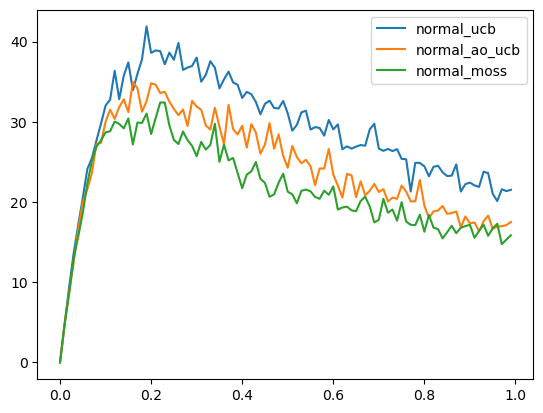

In [22]:
plt.plot(normal_ucb['μ2-μ1'], normal_ucb['regret'], label='normal_ucb')
plt.plot(normal_ao_ucb['μ2-μ1'], normal_ao_ucb['regret'], label='normal_ao_ucb')
plt.plot(normal_moss['μ2-μ1'], normal_moss['regret'], label='normal_moss')
plt.legend()

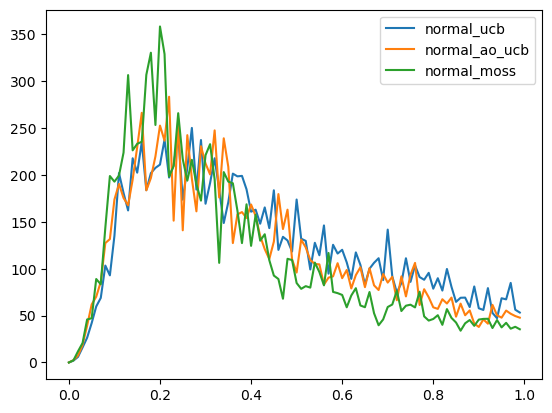

In [23]:
plt.plot(normal_ucb['μ2-μ1'], normal_ucb['variance'], label='normal_ucb')
plt.plot(normal_ao_ucb['μ2-μ1'], normal_ao_ucb['variance'], label='normal_ao_ucb')
plt.plot(normal_moss['μ2-μ1'], normal_moss['variance'], label='normal_moss')
plt.legend()

# Q4

In [27]:
def moss_b(b1, b2, n):
    regret = []
    for i in range(100):
        true_reward = max(b1, b2) * n

        arm1_count = 1
        arm2_count = 1

        b1_empirical = [np.random.choice([0,1], p=[1-b1, b1])]
        b2_empirical = [np.random.choice([0,1], p=[1-b2, b2])]

        for j in range(n-2):
            ucb = [0,0]

            # arm1 calculation
            ucb[0] = np.mean(b1_empirical) + np.sqrt((4/arm1_count)*np.log(max(1, n/(2*arm1_count))))

            # arm2 calculation
            ucb[1] = np.mean(b2_empirical) + np.sqrt((4/arm2_count)*np.log(max(1, n/(2*arm2_count))))

            if ucb.index(max(ucb)) == 0:
                arm1_count += 1
                b1_empirical.append(np.random.choice([0,1], p=[1-b1, b1]))
            else:
                arm2_count += 1
                b2_empirical.append(np.random.choice([0,1], p=[1-b2, b2]))
                
        regret.append(true_reward - (len(b1_empirical)*b1 + len(b2_empirical)*b2))
    
    return [np.mean(regret), np.var(regret)]

In [28]:
bernoulli_moss = pd.DataFrame()
bernoulli_moss['μ2-μ1'] = [each - prob1 for each in prob2]
bernoulli_moss['regret'] = [moss_b(prob1, each, n)[0] for each in prob2]
bernoulli_moss['variance'] = [moss_b(prob1, each, n)[1] for each in prob2]
bernoulli_moss

,μ2-μ1,regret,variance
0,-0.50,21.2850,1.261875
1,-0.49,21.3052,2.449476
2,-0.48,21.6000,3.004416
3,-0.47,22.0289,6.002538
4,-0.46,21.6154,5.400117
...,...,...,...
95,0.45,21.5775,28.596159
96,0.46,21.7718,17.399339
97,0.47,21.6952,22.513156
98,0.48,21.4656,22.947287


In [24]:
def kl_ucb(b1, b2, n):
    def divergence(p, q):
        if p == 0:
            if q == 0:
                return 0
            return np.log(1/(1-q))
        if p == 1:
            if q == 1:
                return 0
            return np.log(1/q)
        return p*np.log(p/q) + (1-p)*np.log((1-p)/(1-q))
    
    regret = []
    for i in range(100):
        true_reward = max(b1, b2) * n

        arm1_count = 1
        arm2_count = 1

        b1_empirical = [np.random.choice([0,1], p=[1-b1, b1])]
        b2_empirical = [np.random.choice([0,1], p=[1-b2, b2])]

        for j in range(n-2):
            ucb = [0,0]

            # arm1 calculation
            p1 = np.mean(b1_empirical)
            bound1 = np.log(1 + j*np.log(np.log(j))) / arm1_count
            
            lower1 = p1
            upper1 = 1
            for k in range(10):
                q1 = (lower1 + upper1) / 2
                if (upper1 - lower1 < 0.0001):
                    break
                test = divergence(p1, q1)
                if test < bound1:
                    lower1 = q1
                else:
                    upper1 = q1
            
            ucb[0] = q1

            # arm2 calculation
            p2 = np.mean(b2_empirical)
            bound2 = np.log(1 + j*np.log(np.log(j))) / arm2_count
            
            lower2 = p2
            upper2 = 1
            for k in range(10):
                q2 = (lower2 + upper2) / 2
                if (upper2 - lower2 < 0.0001):
                    break
                test = divergence(p2, q2)
                if test < bound2:
                    lower2 = q2
                else:
                    upper2 = q2
                    
            ucb[1] = q2
            
            if ucb.index(max(ucb)) == 0:
                arm1_count += 1
                b1_empirical.append(np.random.choice([0,1], p=[1-b1, b1]))
            else:
                arm2_count += 1
                b2_empirical.append(np.random.choice([0,1], p=[1-b2, b2]))
                
        regret.append(true_reward - (len(b1_empirical)*b1 + len(b2_empirical)*b2))
    
    return [np.mean(regret), np.var(regret)]

In [25]:
bernoulli_kl = pd.DataFrame()
bernoulli_kl['μ2-μ1'] = [each - prob1 for each in prob2]
bernoulli_kl['regret'] = [kl_ucb(prob1, each, n)[0] for each in prob2]
bernoulli_kl['variance'] = [kl_ucb(prob1, each, n)[1] for each in prob2]
bernoulli_kl

C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\1281275115.py:28: RuntimeWarning: divide by zero encountered in log
  bound1 = np.log(1 + j*np.log(np.log(j))) / arm1_count
C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\1281275115.py:28: RuntimeWarning: invalid value encountered in log
  bound1 = np.log(1 + j*np.log(np.log(j))) / arm1_count
C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\1281275115.py:46: RuntimeWarning: divide by zero encountered in log
  bound2 = np.log(1 + j*np.log(np.log(j))) / arm2_count
C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\1281275115.py:46: RuntimeWarning: invalid value encountered in log
  bound2 = np.log(1 + j*np.log(np.log(j))) / arm2_count
C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\1281275115.py:28: RuntimeWarning: divide by zero encountered in log
  bound1 = np.log(1 + j*np.log(np.log(j))) / arm1_count
C:\Users\hi3nb\AppData\Local\Temp\ipykernel_41532\1281275115.py:28: RuntimeWarning: invalid value encountered in log
  bound1 = np.l

,μ2-μ1,regret,variance
0,-0.50,4.8750,0.058100
1,-0.49,4.9294,0.646613
2,-0.48,4.9536,0.895127
3,-0.47,5.1794,1.543539
4,-0.46,5.4142,1.869084
...,...,...,...
95,0.45,3.1635,3.999861
96,0.46,3.3994,3.445081
97,0.47,2.9422,2.004425
98,0.48,2.4000,2.618703


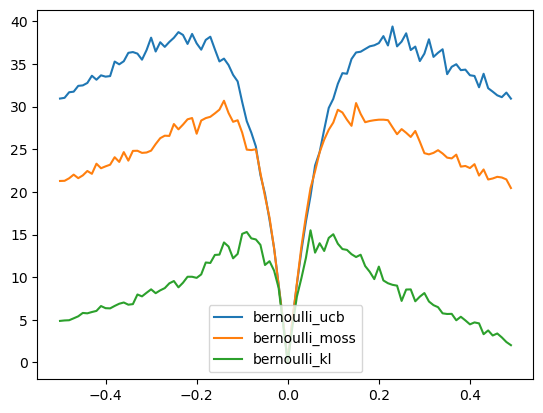

In [29]:
plt.plot(bernoulli_ucb['μ2-μ1'], bernoulli_ucb['regret'], label='bernoulli_ucb')
plt.plot(bernoulli_moss['μ2-μ1'], bernoulli_moss['regret'], label='bernoulli_moss')
plt.plot(bernoulli_kl['μ2-μ1'], bernoulli_kl['regret'], label='bernoulli_kl')
plt.legend()

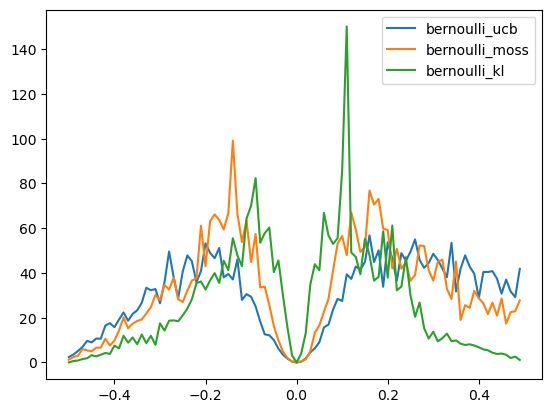

In [30]:
plt.plot(bernoulli_ucb['μ2-μ1'], bernoulli_ucb['variance'], label='bernoulli_ucb')
plt.plot(bernoulli_moss['μ2-μ1'], bernoulli_moss['variance'], label='bernoulli_moss')
plt.plot(bernoulli_kl['μ2-μ1'], bernoulli_kl['variance'], label='bernoulli_kl')
plt.legend()